# How many responses per contest?

This notebook will analyze the number of responses/captions per contest, both treating all contest equally and throughout time.

In [1]:
import os
import sys
from pathlib import Path
p = Path(".").absolute()
root = p.parent.parent
sys.path.append(str(root))

In [2]:
import caption_contest_data as ccd

In [3]:
contests = ccd.summary_ids()
print(contests)

{'509-round1_summary_LilUCB.csv', 520, 521, 522, 523, 524, '559_summary_KLUCB.csv', 526, 527, 528, 529, 530, '511_summary_LilUCB.csv', '517_summary_LilUCB.csv', 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 552, 553, 554, 555, 557, 558, 551, 556, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, '514_summary_RoundRobin.csv', 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, '512_summary_RoundRobin.csv', 634, 635, 636, '513_summary_RoundRobin.csv', 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, '508-round1_summary_RoundRobin.csv', 665, 666, 667, 668, '508-round1_summary_LilUCB.csv', '515

In [4]:
len(contests)

193

In [5]:
summaries = [ccd.summary(c) for c in contests]

In [6]:
import pandas as pd
summary = pd.concat(summaries, sort=False)

In [7]:
summary.head()

,target_id,rank,funny,somewhat_funny,unfunny,count,score,precision,contest,caption
0,6785.0,1,22,18,12,52,2.192308,0.109979,509,I recommend the trout.
1,3197.0,2,5,11,7,23,1.913043,0.152878,509,May I recommend the trout?
2,469.0,3,5,9,8,22,1.863636,0.165085,509,"On second thought, maybe we should just go wit..."
3,1800.0,4,5,6,8,19,1.842105,0.191381,509,"Take my wife, please!"
4,2317.0,5,5,5,9,19,1.789474,0.196146,509,All that work to die a virgin.


In [8]:
import numpy as np
counts = summary.pivot_table(index="contest", values="count", aggfunc=np.sum)
nunique = summary.pivot_table(index="contest", values="caption", aggfunc=lambda x: x.nunique())
df = pd.merge(counts, nunique, left_index=True, right_index=True)
df["n_unique"] = df["caption"]
df.drop(columns="caption", inplace=True)
df.head()

,count,n_unique
contest,,
508,137868,6778
509,98241,7858
510,82627,3905
511,56660,3325
512,43120,4399


In [9]:
df.index.unique()

Int64Index([508, 509, 510, 511, 512, 513, 514, 515, 516, 517,
            ...
            676, 677, 678, 679, 680, 681, 682, 683, 684, 685],
           dtype='int64', name='contest', length=176)

In [10]:
"{} million human responses".format(df["count"].sum() / 1e6)

'119.157775 million human responses'

In [11]:
"{} captions".format(df["n_unique"].sum())

'970327 captions'

In [12]:
"{} contests".format(len(df))

'176 contests'

Text(0.5, 0, 'Responses (millions)')

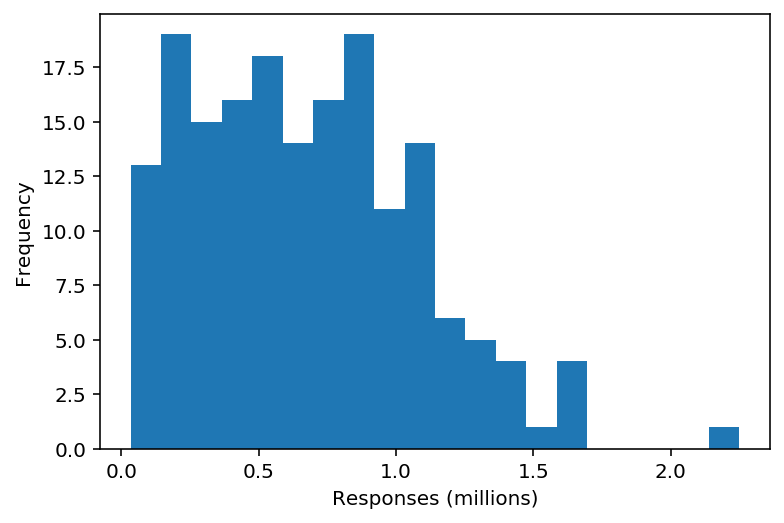

In [13]:
responses = df["count"] / 1e6
ax = responses.plot.hist(bins=20)
ax.set_xlabel("Responses (millions)")

Text(0.5, 0, 'Unique captions')

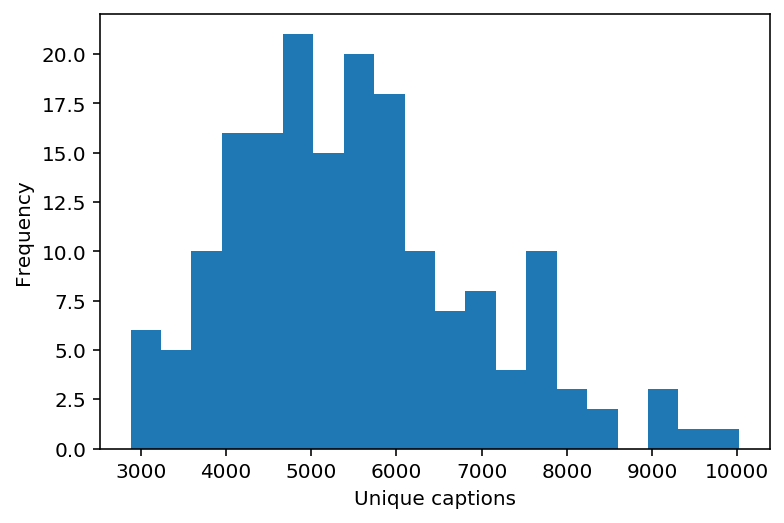

In [14]:
responses = df["n_unique"]
ax = responses.plot.hist(bins=20)
ax.set_xlabel("Unique captions")

Text(0, 0.5, 'Number of responses')

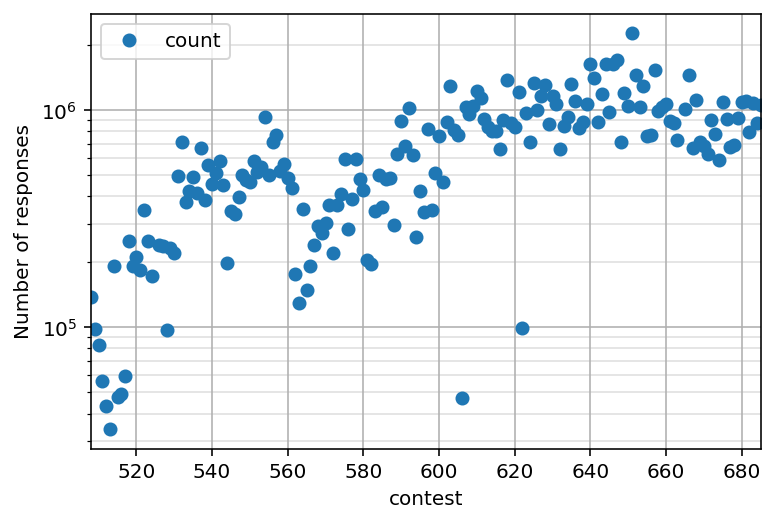

In [15]:
ax = df.reset_index().plot(x="contest", y="count", style="o")
ax.set_yscale("log")
ax.grid()
ax.grid(which="minor", alpha=0.4)
ax.set_ylabel("Number of responses")

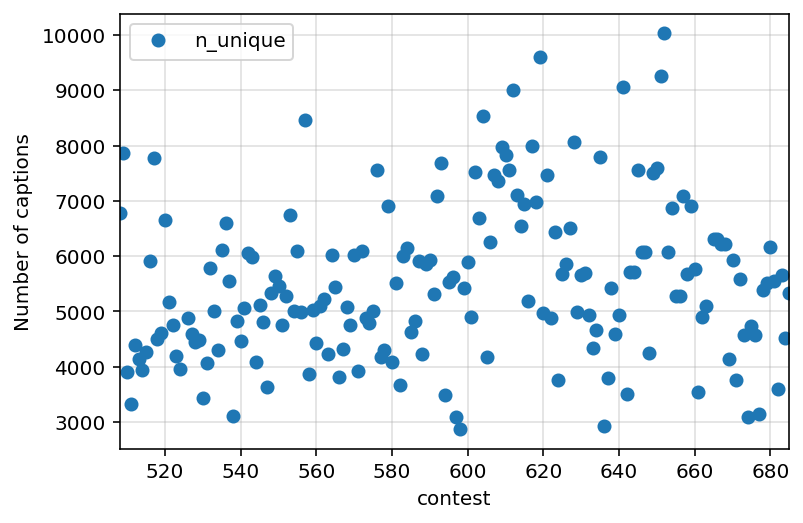

In [16]:
ax = df.reset_index().plot(x="contest", y="n_unique", style="o")
ax.set_ylabel("Number of captions")
ax.grid(alpha=0.4)